Question 1 Part A

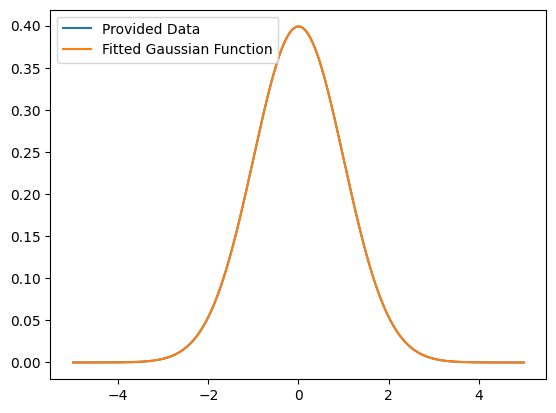

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

# Generate data
x_data = np.arange(-5, 5, 0.001)
y_data = norm.pdf(x_data, loc=0, scale=1)

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Fit Gaussian function to data
params, cov = curve_fit(gaussian, x_data, y_data)
A_fit, mu_fit, sigma_fit = params

# Generate fitted curve
y_fit = gaussian(x_data, A_fit, mu_fit, sigma_fit)

# Plot the data and the fitted curve
plt.plot(x_data, y_data, label='Provided Data')
plt.plot(x_data, y_fit, label='Fitted Gaussian Function')
plt.legend()
plt.show()

Question 1 Part B

In [47]:
sample1 = np.random.normal(30, 16, 50)
sample2 = np.random.normal(33, 18, 50)
print(f"Sample 1: Mean = {sample1.mean():.2f}, Standard Deviation = {sample1.std():.2f}")
print(f"Sample 2: Mean = {sample2.mean():.2f}, Standard Deviation = {sample2.std():.2f}")

Sample 1: Mean = 30.81, Standard Deviation = 15.27
Sample 2: Mean = 33.09, Standard Deviation = 17.51


Question 2 Part A

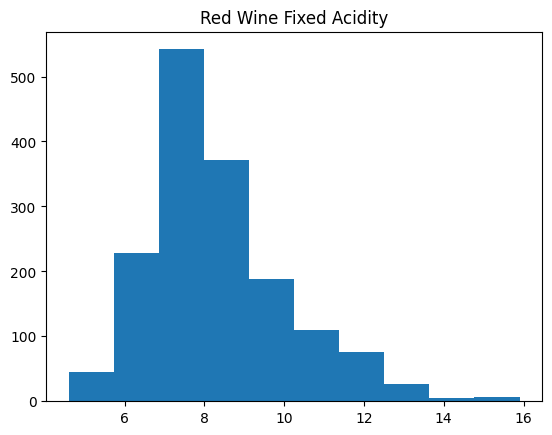

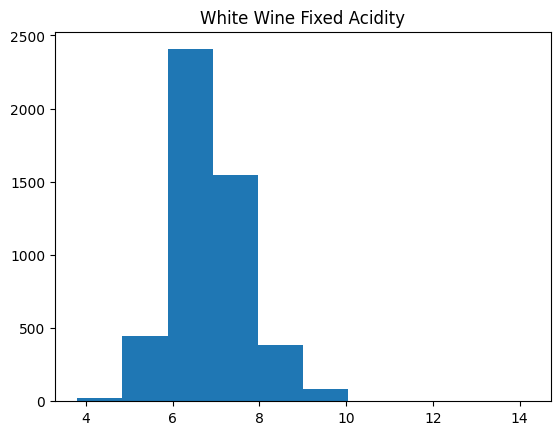

Pearson index of skew (Red Wine) = 0.7232831679055276


In [46]:
# Define a function to plot a histogram of fixed acidity data
def plot_histogram(data, title):
    fix_acid_data = []
    # Loop through each row of the data
    for i in range(data.shape[0]):
        # Extract the fixed acidity value from the first column of the row
        row = data.iloc[i][0].split(';')[0]
        # Convert the value to a float and add it to the list of fixed acidity data
        fix_acid_data.append(float(row))
    # Plot a histogram of the fixed acidity data with the given title
    plt.hist(fix_acid_data)
    plt.title(title)
    plt.show()

# Call the plot_histogram function with the red and white wine data and titles
plot_histogram(data_red, 'Red Wine Fixed Acidity')
plot_histogram(data_white, 'White Wine Fixed Acidity')

# Define a function to calculate the Pearson index of skewness for a given list of data
def pearson_skewness_index(data):
    # Calculate the mean, median, and standard deviation of the data
    mean = np.mean(data)
    median = np.median(data)
    sigma = np.std(data)
    # Calculate and return the Pearson index of skewness
    pearson_index = 3 * (mean - median) / sigma
    return pearson_index

# Calculate and print the Pearson index of skewness for the fixed acidity data of red wine
fix_acid_red = []
for i in range(data_red.shape[0]):
    row = data_red.iloc[i][0].split(';')[0]
    fix_acid_red.append(float(row))
print(f"Pearson index of skew (Red Wine) = {pearson_skewness_index(fix_acid_red)}")

Question 2 Part B

In [45]:
# Define a function to calculate the third moment
def calculate_third_moment(data):
    # Calculate the mean and standard deviation of the data
    mean = np.mean(data)
    sigma = np.std(data)
    # Calculate the third moment using the formula
    third_moment = sum((x - mean)**3 for x in data) / len(data) / sigma**3
    return third_moment

# Extract the fixed acidity values from red wine data
fix_acid_red = [float(row.split(';')[0]) for row in data_red.iloc[:, 0]]

# Calculate the third moment of red wine fixed acidity values
third_moment_red = calculate_third_moment(fix_acid_red)

# Print the third moment of red wine fixed acidity values
print(f'Third moment (Red Wine) = {third_moment_red}')

Third moment (Red Wine) = 0.9818292953262255


Question 3

In [44]:
from scipy.stats import ttest_ind

# Define null and alternative hypotheses
null_hypothesis = "Null Hypothesis (H0): Independent sample means (m1 and m2) are equal. (m1=m2)"
alt_hypothesis = "Alternative Hypothesis (Ha): Independent sample means (m1 and m2) are not equal. (m1!=m2)"

# Print hypotheses
print("Hypotheses for significance level = 0.05:\n", null_hypothesis, "\n", alt_hypothesis, "\n")

# Calculate the t-statistic and p-value using the independent samples t-test
t_statistic, p_value = ttest_ind(fix_acid_red, fix_acid_white)

# Print the results
print('t-statistic = {:.2f}'.format(t_statistic))
print('p-value = {:.2f}'.format(p_value))

# Determine whether to reject or fail to reject the null hypothesis based on the p-value
if p_value < 0.05:
    print("\nThe p-value is smaller than 0.05, therefore null hypothesis is rejected, and the two sample means are significantly different.")
else:
    print("\nThe p-value is greater than 0.05, therefore we fail to reject the null hypothesis, and the two sample means are not significantly different.")

Hypotheses for significance level = 0.05:
 Null Hypothesis (H0): Independent sample means (m1 and m2) are equal. (m1=m2) 
 Alternative Hypothesis (Ha): Independent sample means (m1 and m2) are not equal. (m1!=m2) 

t-statistic = 44.91
p-value = 0.00

The p-value is smaller than 0.05, therefore null hypothesis is rejected, and the two sample means are significantly different.


Question 4

In [43]:
from scipy.stats import wasserstein_distance

# Calculate the Wasserstein distance
wasserstein_distance = wasserstein_distance(fix_acid_red, fix_acid_white)

# Print the result
print('Wasserstein distance = {:.2f}'.format(wasserstein_distance))

Wasserstein distance = 1.46


Question 5

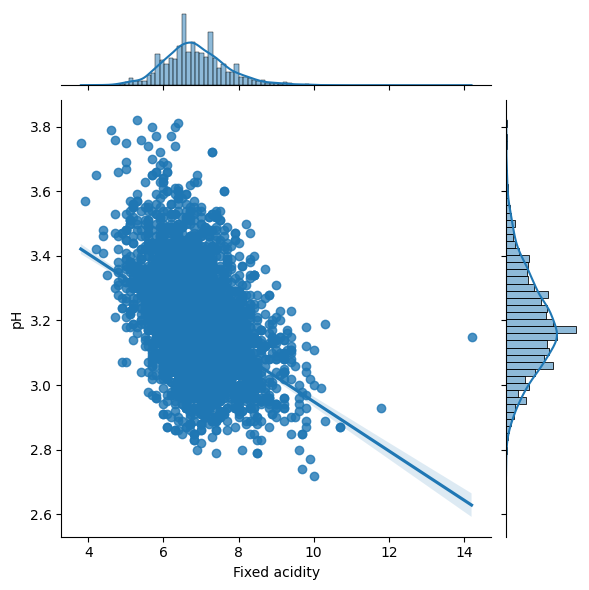

In [42]:
# Extract pH values from white wine data
pH_white = [float(row.split(';')[-4]) for row in data_white.iloc[:,0]]

# Create a pandas DataFrame with fixed acidity and pH values
df = pd.DataFrame({'Fixed acidity': fix_acid_white, 'pH': pH_white})

# Create a joint plot with regression line
sns.jointplot(x='Fixed acidity', y='pH', data=df, kind='reg')

# Display the plot
plt.show()